<h1> Exploratory Data Analysis on Haberman Dataset </h1>

Submitted by- Mustaffa Hussain

In [1]:
#these are the libraries used 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#to import the data from the Dataset in csv format
haberman=pd.read_csv('haberman.csv')

In [3]:
# print the no of instances . the first entry is the no of rows and the second is the no of columns.
print(haberman.shape)

(306, 4)


In [4]:
# the name of the attributes 
print(haberman.columns)

Index(['no of operations', 'age_of operation', 'no_of auxilary _nodes',
       'survival status'],
      dtype='object')


In [5]:
classes=haberman['survival status'].unique()
print("There are {} different classes in haberman dataset.".format(len(classes)))

There are 2 different classes in haberman dataset.


In [6]:
# no of data point per class
haberman['survival status'].value_counts()


1    225
2     81
Name: survival status, dtype: int64

### Motive

Our motive is to perform EDA and draw meaningful insights from the attributes or combinations of attributes as to perform classification. we wish to identify such conditions from attributes that can help us differentiate between these classes.

## PDF Plots:

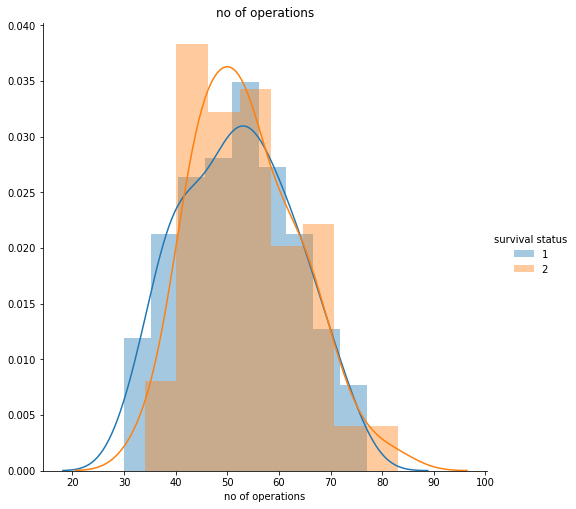

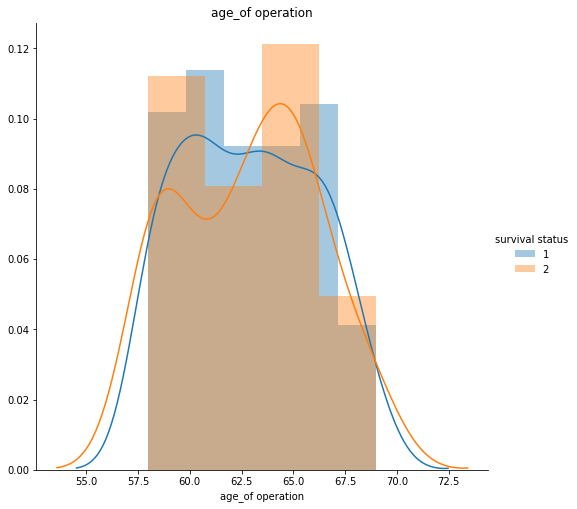

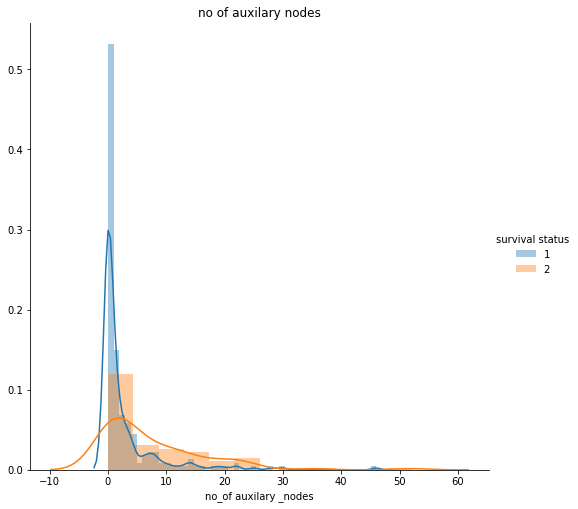

In [7]:
#perform PDF on the given data set using the distribution plot.

sns.FacetGrid(haberman,hue='survival status',height=7).map(sns.distplot,'no of operations').add_legend()
plt.title('no of operations')
sns.FacetGrid(haberman,hue='survival status',height=7).map(sns.distplot,'age_of operation').add_legend()
plt.title('age_of operation')
sns.FacetGrid(haberman,hue='survival status',height=7).map(sns.distplot,'no_of auxilary _nodes').add_legend()
plt.title('no of auxilary nodes')
plt.show()

### Quick observation

From the above distribution plots, it is evident that none of the attributes are single handedly able to give insight about the classes. In order to classify a person as dead or not, PDF test fails due to the major overlapping seen. 

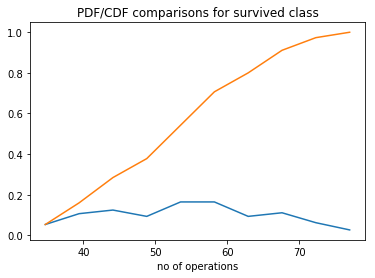

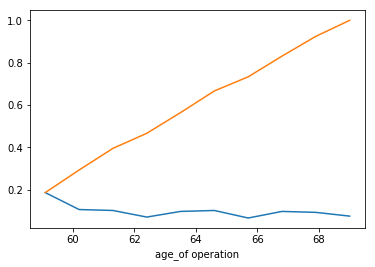

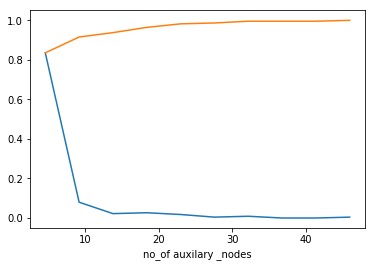

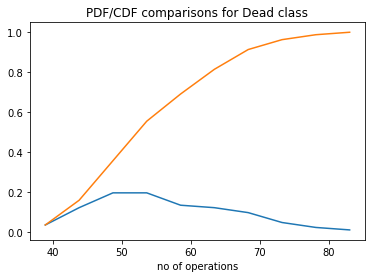

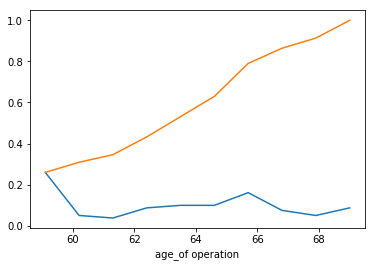

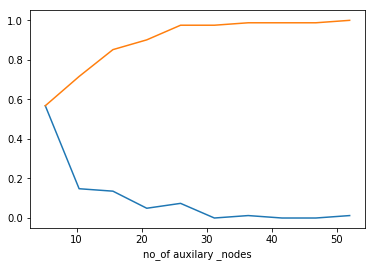

In [8]:
# perform CDF and plot

'''cdf of different attributes on SURVIVED patients'''
survived = haberman.loc[haberman["survival status"] == 1];
dead = haberman.loc[haberman["survival status"] == 2];

plt.title('PDF/CDF comparisons for survived class')
counts, bin_edges = np.histogram(survived['no of operations'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('no of operations')
plt.show();

counts, bin_edges = np.histogram(survived['age_of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age_of operation')
plt.show();

counts, bin_edges = np.histogram(survived['no_of auxilary _nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('no_of auxilary _nodes')
plt.show();

# ===========================================================================================================================#
# ===========================================================================================================================#


'''cdf of different attributes on DEAD patients'''

plt.title('PDF/CDF comparisons for Dead class')

counts, bin_edges = np.histogram(dead['no of operations'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
#print(pdf);
#print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('no of operations')
plt.show();

counts, bin_edges = np.histogram(dead['age_of operation'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('age_of operation')
plt.show();

counts, bin_edges = np.histogram(dead['no_of auxilary _nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.xlabel('no_of auxilary _nodes')
plt.show();


### Quick observation

The above plots are pdf vs cdf plots of the two classes. the 3rd and 6th ;CDF and PDF plots of the classes suggest data is in high density towards starting of the 'no of auxiliary nodes'. that is <25 has max no points in both classes. this again suggest overlapping. moreover all the plots together are not able to give any clear distinction between the two class labels.

## Box Plots

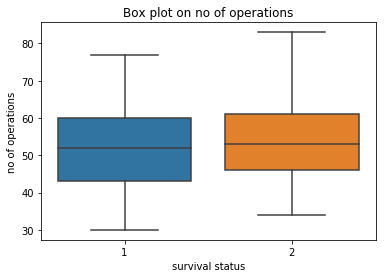

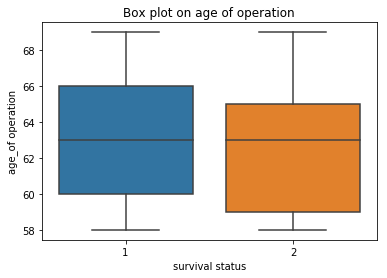

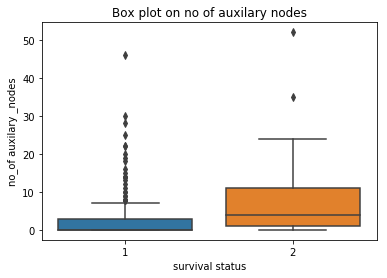

In [9]:
#Box plot

sns.boxplot(x='survival status',y='no of operations', data=haberman)
plt.title('Box plot on no of operations')
plt.show()

sns.boxplot(x='survival status',y='age_of operation', data=haberman)
plt.title('Box plot on age of operation')
plt.show()

sns.boxplot(x='survival status',y='no_of auxilary _nodes', data=haberman)
plt.title('Box plot on no of auxilary nodes')
plt.show()

## Quick observation

The box plots clealy shows overlappling over all the attributes. the findings go in hand with the above methods. the coloured regions presents the 50% od data in the respective attributes in the repective plots.

## Vilon plots

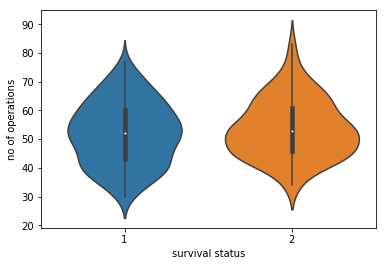

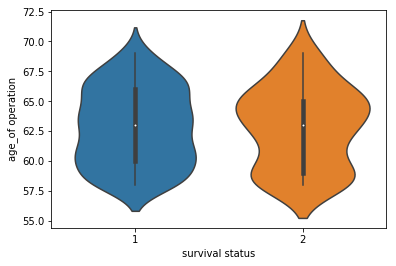

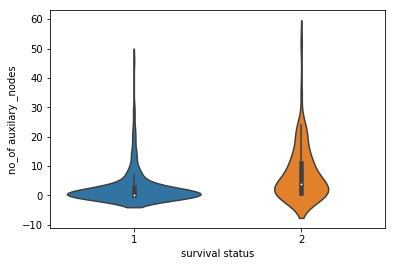

In [10]:
# violin plots

sns.violinplot(x='survival status',y='no of operations', data=haberman, size=10)
plt.show()

sns.violinplot(x='survival status',y='age_of operation', data=haberman, size=10)
plt.show()

sns.violinplot(x='survival status',y='no_of auxilary _nodes', data=haberman, size=10)
plt.show()

## Scatter plots

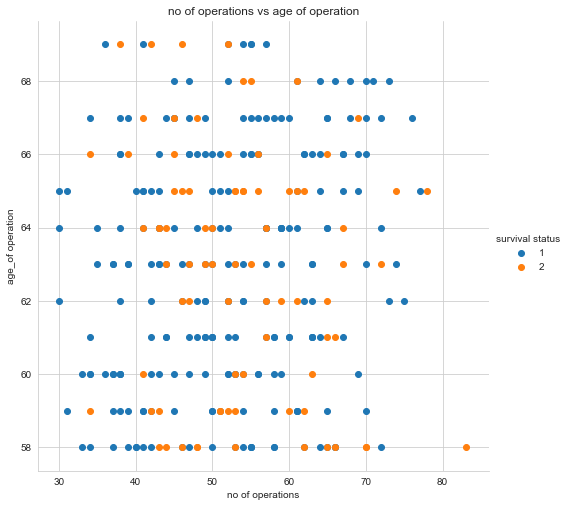

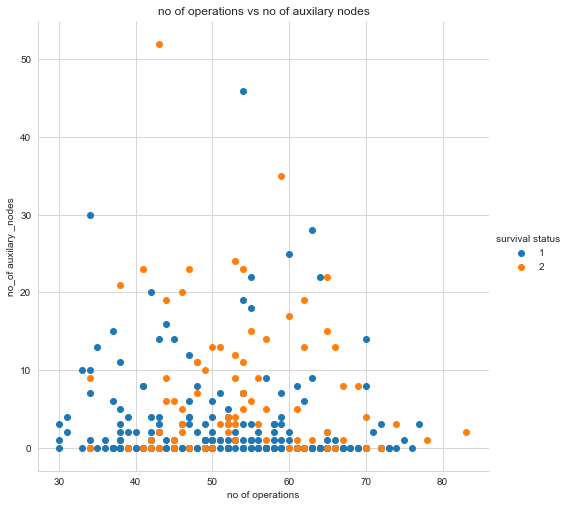

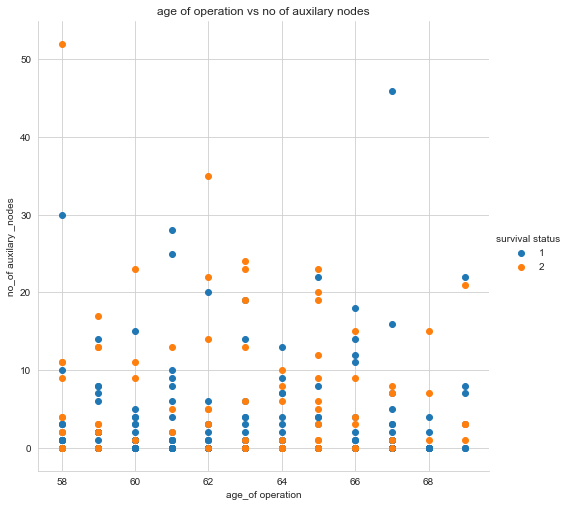

In [11]:
# scatter plots between attributes in combination

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival status", height=7) \
   .map(plt.scatter, "no of operations", "age_of operation") \
   .add_legend();
plt.title('no of operations vs age of operation')
plt.show();


sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival status", height=7) \
   .map(plt.scatter, "no of operations", "no_of auxilary _nodes") \
   .add_legend();
plt.title('no of operations vs no of auxilary nodes')
plt.show();

sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival status", height=7) \
   .map(plt.scatter, "age_of operation", "no_of auxilary _nodes") \
   .add_legend();
plt.title('age of operation vs no of auxilary nodes')
plt.show();

## Pair plots

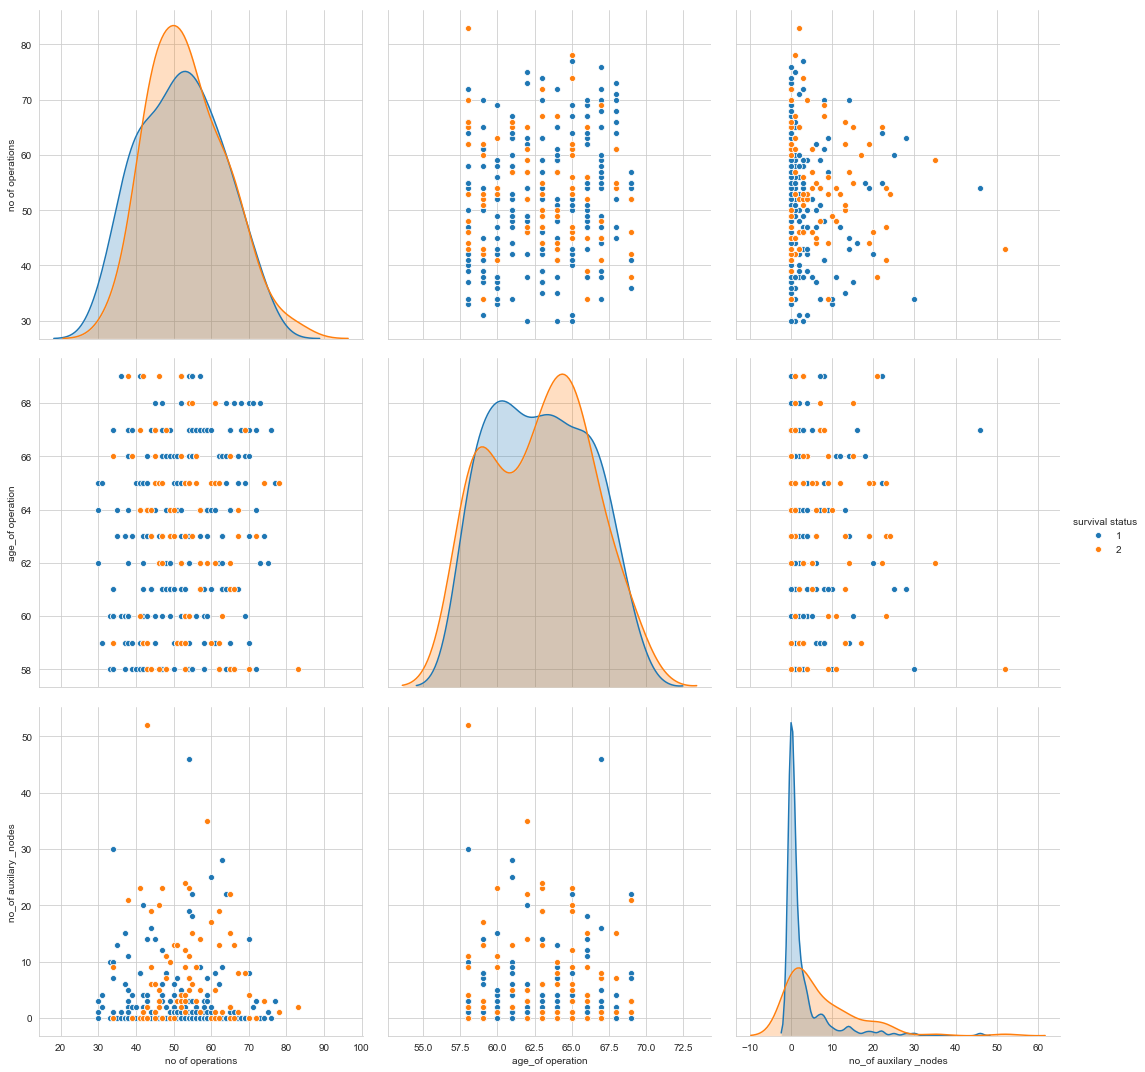

In [12]:
#pair plot

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival status",vars=['no of operations','age_of operation','no_of auxilary _nodes'], height=5);
plt.show()

# Conclusions


In the above exercise  we performed EDA upon the dataset. we fail to distinctively find any attribute that can help classify between the dead and live class. EDA is not able to provide the insight needed to perform the objective of classification.